In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [122]:
Pkg.add(["MAT","LinearAlgebra","Plots","Clustering","StatsPlots","Distributions","PDMats","Distances"])

   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [f3b207a7] + StatsPlots v0.15.7
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [7d9fca2a] + Arpack v0.5.4
  [6f286f6a] + MultivariateStats v0.10.3
  [f3b207a7] + StatsPlots v0.15.7
  [ab02a1b2] + TableOperations v1.2.0
  [cc8bc4a8] + Widgets v0.6.6
⌅ [68821587] + Arpack_jll v3.5.1+1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ TableOperations
  ✓ MultivariateStats
  ✓ StatsPlots
  3 dependencies successfully precompiled in 4 seconds. 527 already precompiled.


In [123]:
using MAT, LinearAlgebra, Plots, Clustering, StatsPlots, Distributions, PDMats, Distances

In [63]:
nd1 = MvNormal([0,0],PDMat([1 0; 0 2]))

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 0.0; 0.0 2.0]
)


In [69]:
nd1sample = rand(nd1, 1000)

2×1000 Matrix{Float64}:
 -2.55433   0.199619   0.921397   …  -1.26541   -0.695957   0.0433887
  0.472745  0.997951  -0.0718382     -0.944002  -1.78059   -0.993763

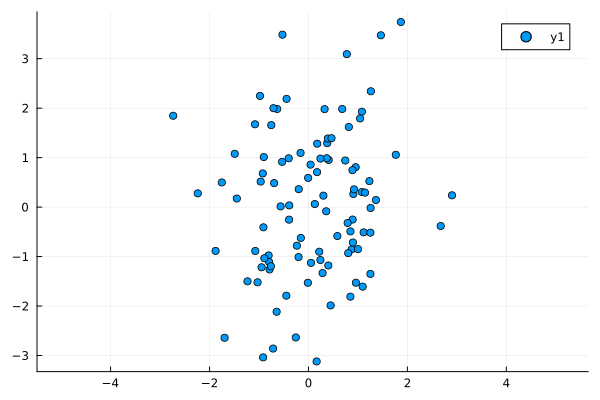

In [65]:
scatter(nd1sample[1,:],nd1sample[2,:],aspect_ratio = :equal)

In [39]:
PDMat([1 -1; 1 1]*[1 0; 0 5]*[1 -1; 1 1]')

2×2 PDMat{Float64, Matrix{Float64}}:
  6.0  -4.0
 -4.0   6.0

In [58]:
vec([1 -2]*[1 -1; 1 1])

2-element Vector{Int64}:
 -1
 -3

In [83]:
nd2 = MvNormal([1, -2],PDMat([1 -1; 1 1]'*[1 0; 0 5]*[1 -1; 1 1]))

FullNormal(
dim: 2
μ: [1.0, -2.0]
Σ: [6.0 4.0; 4.0 6.0]
)


In [84]:
nd2sample = rand(nd2, 1000)
mean(nd2sample, dims=2)

2×1 Matrix{Float64}:
  1.0258972268454927
 -2.066551086068678

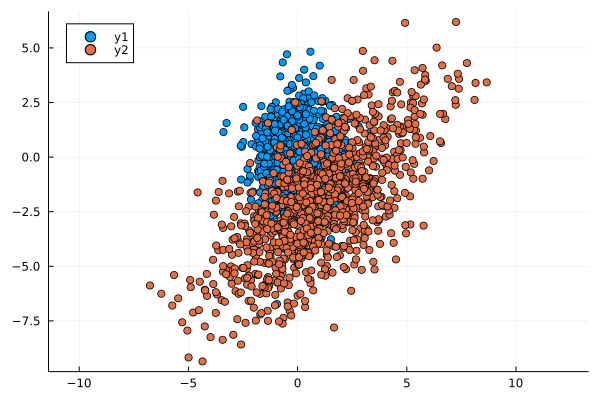

In [85]:
scatter(nd1sample[1,:],nd1sample[2,:],aspect_ratio = :equal)
scatter!(nd2sample[1,:],nd2sample[2,:],aspect_ratio = :equal)

In [47]:
nd1rr = (nd1sample'*[1 -1; 1 1]')'

2×1000 adjoint(::Matrix{Float64}) with eltype Float64:
 1.93937   2.99899    2.93357   3.10078  …  0.427431  -0.153563  -0.87486
 0.368509  0.476261  -1.73591  -1.10859     1.81176   -3.20717    2.2851

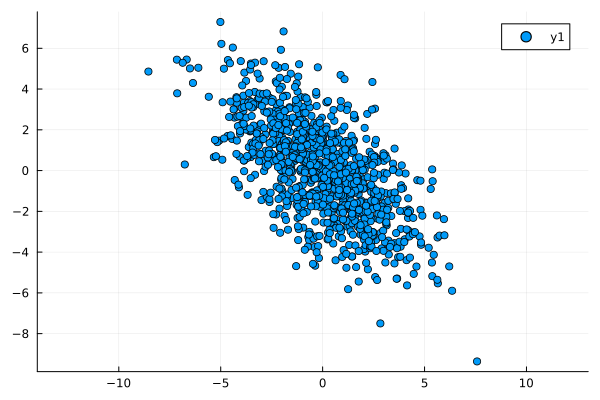

In [48]:
scatter(nd1rr[1,:],nd1rr[2,:],aspect_ratio = :equal)

In [93]:
# training & testing set sizes
n1=100;  # training set size
n2=50;   # test set size

# random ellipse 1 centered at (0,0)
dn1 = Normal(0,1)
x=rand(dn1,n1+n2); y=0.5*rand(dn1,n1+n2);

# random ellipse 2 centered at (1,-2) and rotated by theta
x2=rand(dn1,n1+n2).+1; y2=0.2*rand(dn1,n1+n2).-2; theta=pi/4;
A=[cos(theta) -sin(theta); sin(theta) cos(theta)];
x3=A[1,1]*x2 .+ A[1,2]*y2; y3=A[2,1]*x2 .+ A[2,2]*y2;

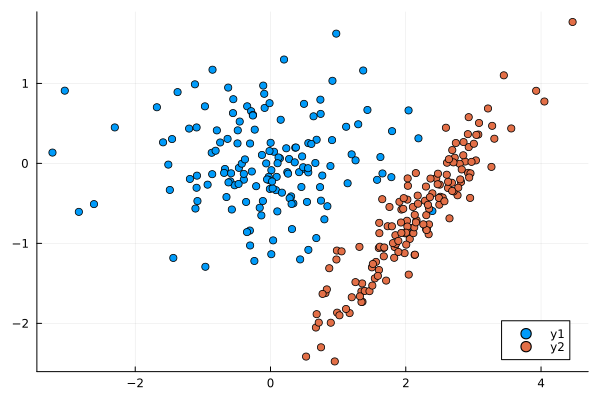

In [94]:
scatter(x,y)
scatter!(x3,y3)

In [97]:
xx = hcat(x,y)

150×2 Matrix{Float64}:
  0.138792    0.0633553
 -0.276462   -0.101477
  1.11841     0.457881
 -0.344666    0.713718
  0.200157    1.29852
  0.0128094  -0.0851582
  0.489724   -0.0678065
  0.915999    1.0325
 -0.305187   -0.839765
  0.248533   -0.109931
  1.7973      0.403126
  0.558654   -0.112442
 -0.673375   -0.0698081
  ⋮          
  0.032049   -0.312686
  0.483092   -0.0483046
 -0.0508862  -0.200555
  1.2971      0.489038
  0.796551   -0.699454
 -0.861867   -0.134823
  1.25762     0.0380514
  0.555069   -0.0601705
 -1.09275     0.449352
  0.677228   -0.933981
  0.0230823  -0.22595
 -0.811697    0.158102

In [98]:
xx2 = hcat(x3,y3)

150×2 Matrix{Float64}:
 2.49634   -0.516607
 1.55925   -1.23161
 0.981657  -1.09004
 3.0722     0.360673
 0.747177  -2.29951
 2.05867   -0.945098
 2.17622   -0.40287
 1.65208   -0.44778
 1.847     -0.898004
 2.28479   -0.467003
 2.01803   -0.717294
 2.92133   -0.1183
 0.682582  -1.88527
 ⋮         
 2.13487   -1.14117
 2.80553   -0.200422
 1.75903   -0.545019
 1.93492   -0.869835
 1.16948   -1.87187
 2.47128   -0.261134
 1.11661   -1.82037
 2.91819    0.365578
 2.35681   -0.42279
 4.04966    0.773666
 1.51356   -1.25739
 1.89091   -1.10754

In [99]:
xtotal = vcat(xx,xx2)

300×2 Matrix{Float64}:
  0.138792    0.0633553
 -0.276462   -0.101477
  1.11841     0.457881
 -0.344666    0.713718
  0.200157    1.29852
  0.0128094  -0.0851582
  0.489724   -0.0678065
  0.915999    1.0325
 -0.305187   -0.839765
  0.248533   -0.109931
  1.7973      0.403126
  0.558654   -0.112442
 -0.673375   -0.0698081
  ⋮          
  2.13487    -1.14117
  2.80553    -0.200422
  1.75903    -0.545019
  1.93492    -0.869835
  1.16948    -1.87187
  2.47128    -0.261134
  1.11661    -1.82037
  2.91819     0.365578
  2.35681    -0.42279
  4.04966     0.773666
  1.51356    -1.25739
  1.89091    -1.10754

In [101]:
result = kmeans(xtotal', 2); # run K-means for the 3 clusters
result.assignments

300-element Vector{Int64}:
 1
 1
 2
 1
 1
 1
 1
 1
 1
 1
 2
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

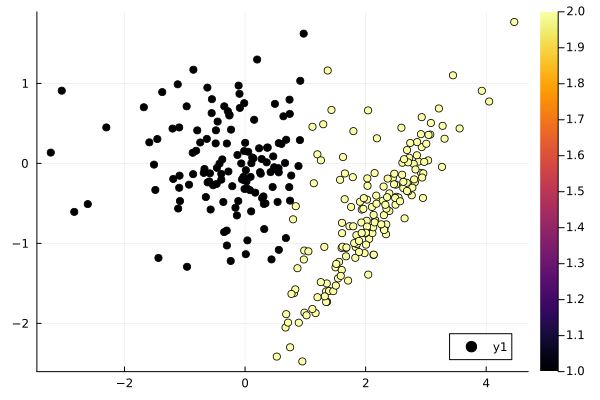

In [102]:
scatter(xtotal[:,1],xtotal[:,2],zcolor=result.assignments)

In [109]:
c = result.centers'

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.271766   0.00109414
  2.06508   -0.595238

In [112]:
midx=(c[1,1]+c[2,1])/2; midy=(c[1,2]+c[2,2])/2;
slope=(c[2,2]-c[1,2])/(c[2,1]-c[1,1]); # rise/run
b=midy+(1/slope)*midx;
xsep=-0:0.1:2; ysep=-(1/slope) .* xsep .+ b;

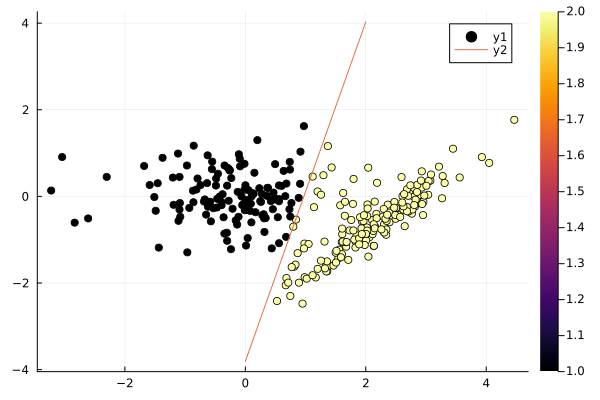

In [113]:
scatter(xtotal[:,1],xtotal[:,2],zcolor=result.assignments)
plot!(xsep,ysep)

In [119]:
D = pairwise(Euclidean(), xtotal', xtotal', dims=2)

300×300 Matrix{Float64}:
 0.0       0.446772  1.05608   0.810372  …  3.97485  1.9064    2.10735
 0.446772  0.0       1.50285   0.818043     4.41375  2.1308    2.38949
 1.05608   1.50285   0.0       1.48528      2.94821  1.76019   1.74565
 0.810372  0.818043  1.48528   0.0          4.39474  2.70892   2.88354
 1.23669   1.4789    1.24494   0.799266     3.88512  2.87362   2.94071
 0.194751  0.289731  1.23177   0.87521   …  4.1272   1.9043    2.13835
 0.374642  0.766925  0.819511  1.14324      3.65804  1.5695    1.74481
 1.2423    1.64556   0.609233  1.30035      3.14433  2.36658   2.35165
 1.00635   0.738847  1.92627   1.55398      4.64412  1.86608   2.21236
 0.205113  0.525063  1.0388    1.01503      3.90248  1.70791   1.92162
 1.69295   2.13427   0.68109   2.16437   …  2.28264  1.68458   1.51357
 0.45518   0.835188  0.799124  1.22414      3.60171  1.49089   1.66287
 0.823011  0.398175  1.86788   0.849684     4.79776  2.48858   2.7663
 ⋮                                       ⋱           

In [120]:
hc = hclust(D)

Hclust{Float64}([-262 -289; -48 -97; … ; 295 297; -284 298], [0.005033555220182896, 0.008047246686780541, 0.00921934954266605, 0.01037201021409475, 0.01342061277184832, 0.013719880538763753, 0.014156066595394262, 0.015056029631622978, 0.018682406913021518, 0.0205989292158783  …  0.4760101212339771, 0.4867592769250459, 0.5159131940265403, 0.5923652149699001, 0.6713078963152198, 0.6988989844696114, 0.7952299989045423, 0.8375542007643707, 0.8707741332684478, 1.0148871121174041], [284, 46, 50, 95, 88, 205, 298, 270, 87, 5  …  137, 8, 44, 106, 76, 107, 49, 121, 57, 64], :single)

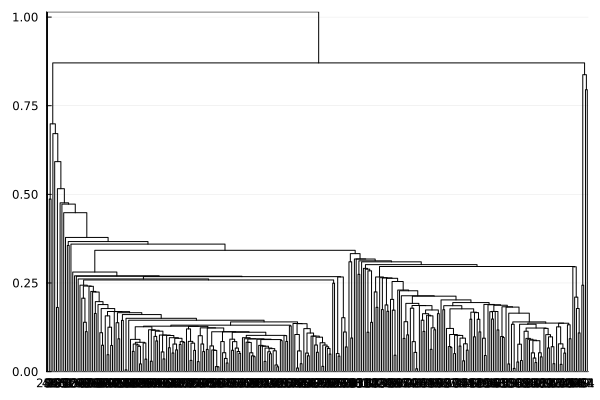

In [124]:
plot(hc)